## 주택 가격 예측 : 회귀 문제
개별적인 레이블 대신에 연속적인 값을 예측하는 회귀(regression) 문제. 예를 들어 기상 데이터가 주어졌을 때 내일 기온을 예측하거나, 소프트웨어 명세가 주어졌을 때 소프트웨어 프로젝트가 완료될 시간을 예측하는 것을 회귀 문제라 한다.<br><br>
이 절에서는 1970년 중반 보스턴 외곽의 데이터가 주어졌을 때 주택 가격의 중간 값을 예측해보려한다

In [58]:
from tensorflow.keras.datasets import boston_housing

(train_x, train_y), (test_x, test_y) = (boston_housing.load_data())

57026/57026 [==============================] - 0s 0us/step


In [59]:
# 훈련 데이터는 404개
# 테스트 데이터는 102개
# 13개의 특성
print(train_x.shape)
print(test_x.shape)

#
print(train_x.shape)
print(train_y.shape)
print(test_y.shape)

# 예시 살펴보기
print(train_y[:6])

(404, 13)
(102, 13)
(404, 13)
(404,)
(102,)
[15.2 42.3 50.  21.1 17.7 18.5]


### 데이터 전처리(준비)
- 정규화(normalization) : 0~1 사이의 값으로 변경해주는 것 <br>
정규화의 목적은 데이터셋의 numerical value 범위의 차이를 왜곡하지 않고 공통 척도로 변경하는 것이다. 기계학습에서 모든 데이터셋이 정규화 될 필요는 없고, 피처의 범위가 다른 경우에만 필요<br>
- 표준화(standardizaion) : 평균 0, 분산 1이 되도록 변경해주는 것<br>표준정규분포의 속성을 갖도록 피처가 재조정되는 것
<br><br>
상이한 스케일을 가진 값을 신경망에 주입하면, 모델이 이런 다양한 데이터에 자동으로 맞추려고 할 수도 있지만 이는 학습을 더 어렵게 만드는 등의 문제를 일으킬 수 있다. 따라서 이런 데이터를 다룰 때 대표적인 방법은 특성별로 정규화를 하는 것인데, 입력 데이터에 있는 각 특성(입력 데이터 행렬의 열)에 대해 특성의 평균을 빼고 표준편차로 나눈다.
<br><br>
이를 통패 특성의 중앙이 0근처에 맞춰지고 표준편차는 1이된다

In [60]:
# 컬럼별로 평균 구하기
mean = train_x.mean(axis=0)
# 컬럼별로 분산 구하기
std = train_x.std(axis = 0)
# train_x에서 계산해주기
train_x = (train_x - mean) / std

train_x[:3]

array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
         1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
        -1.71818909,  0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , -0.25683275,  0.62864202,
        -1.82968811,  1.11048828, -1.18743907,  1.67588577,  1.5652875 ,
         0.78447637,  0.22061726, -1.30850006]])

### test 데이터 정규화시 평균과 분산은
test 데이터 셋도 동일하게 변경을 해줘야 한다.<br>
이때 평균과 분산은 test로 새로 계산해줘야 하는가?<br>
-> train 데이터에서 계산한 값으로 해주어야 한다.<br>

In [61]:
test_x = (test_x - mean) / std

In [62]:
test_x.shape

(102, 13)

### 모델 구성
아래 모델의 마지막 층은 하나의 유닛을 가지고 있고 활성화 함수가 없다(선형층). 이것은 전형적인 스칼라 회귀(하나의 연속적인 값을 예측하는 회귀)를 위한 구성이다.<br><br>
손실함수로 mse 를 사용하여 컴파일 해주었는데. 이 함수는 평균 제곱 오차(mean squared error) 의 약어로 예측과 타깃 사이 거리의 제곱을 뜻한다. 회귀 문제에서 널리 사용되는 손실함수<br><br>

In [63]:
import keras

def build_model() :
  model = keras.Sequential([
      Dense(64, activation='relu'),
      Dense(64, activation='relu'),
      Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics='mae')
  return model

In [64]:
model = build_model()
history = model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=16)

Epoch 1/100
26/26 [==============================] - 1s 2ms/step - loss: 544.0865 - mae: 21.5359
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 399.6449 - mae: 18.0375
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 225.9632 - mae: 12.9145
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 95.8845 - mae: 7.6595
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 46.7959 - mae: 5.1500
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 31.7159 - mae: 4.0879
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 24.4143 - mae: 3.5516
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 21.4110 - mae: 3.2922
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 19.3956 - mae: 3.0410
Epoch 10/100
26/26 [==============================] - 0s 2ms/step - loss: 17.8790 - mae: 2.9782
Epoch 11/100
26/26 [=======================

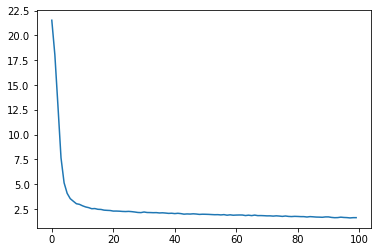

In [65]:
history_mae = history.history['mae']
plt.plot(history_mae)

In [66]:
preds = model.predict(test_x)

4/4 [==============================] - 0s 3ms/step


In [67]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 3ms/step - loss: 17.8302 - mae: 2.6221


[17.83021354675293, 2.622060775756836]

### K-Fold
매개변수들을 조정하면서 모델을 평가하기 위해 데이터를 train 과 validation으로 나눠준다면, 지금 데이터의 경우 수가 많지 않기 때문에 검증 세트도 매우 작아진다. 이렇게 되면 val set와 train set로 어떤 데이터가 선택되었는지에따라 validation 점수가 크게 달라질 수 있는 것이다. 이렇게 되면 모델을 신뢰있게 평가할 수 없게된다
<br><br>
이런 상황에서 가장 좋은 방법은 K-fold cross validation을 사용하는 것인데. 데이터를 K개로 나누고, K개의 모델을 각각 만들어 K-1개의 분할에서는 훈련을 나머지 분할에서는 평가(validation)을 하는 방법이다.

In [68]:
k = 4
num_val_samples = len(train_x) // k
num_epochs = 100
all_scores = []

for i in range(k) :
  print(f'{i}번째 폴드 처리중')
  # 분할 하나를 validation 용으로 빼놓기
  val_data = train_x[i*num_val_samples : (i+1)*num_val_samples]
  val_targets = train_y[i*num_val_samples : (i+1)*num_val_samples]

  # 다른 분할 전체를 train 용으로 데이터 준비
  par_train_data = np.concatenate([
      train_x[:i*num_val_samples],
      train_x[(i+1)*num_val_samples:]
  ], axis = 0)
  par_train_targets = np.concatenate([
      train_y[:i*num_val_samples],
      train_y[(i+1)*num_val_samples:]
  ], axis = 0)

  # 모델 구성
  model = build_model()

  # fit 해주기
  history = model.fit(
      par_train_data, par_train_targets,
      epochs = num_epochs, batch_size=16, verbose=0  )

  # 각 폴드의 validation 값 저장하기
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)

  # 저장해주기
  all_scores.append(val_mse)

0번째 폴드 처리중
1번째 폴드 처리중
2번째 폴드 처리중
3번째 폴드 처리중


In [69]:
all_scores

[7.023070812225342, 9.185294151306152, 12.76341724395752, 11.389884948730469]

In [70]:
k = 4
num_val_samples = len(train_x) // k
num_epochs = 500
all_mae_histories = []

for i in range(k) :
  print(f'{i}번째 폴드 처리중')
  # 분할 하나를 validation 용으로 빼놓기
  val_data = train_x[i*num_val_samples : (i+1)*num_val_samples]
  val_targets = train_y[i*num_val_samples : (i+1)*num_val_samples]

  # 다른 분할 전체를 train 용으로 데이터 준비
  par_train_data = np.concatenate([
      train_x[:i*num_val_samples],
      train_x[(i+1)*num_val_samples:]
  ], axis = 0)
  par_train_targets = np.concatenate([
      train_y[:i*num_val_samples],
      train_y[(i+1)*num_val_samples:]
  ], axis = 0)

  # 모델 구성
  model_1 = build_model()

  # fit 해주기
  history = model_1.fit(
      par_train_data, par_train_targets,
      validation_data=(val_data, val_targets),
      epochs = num_epochs, batch_size=16, verbose=0  )

  # 각 폴드의 validation 값 저장하기
  mae_history = history.history['val_mae']

  # 저장해주기
  all_mae_histories.append(mae_history)

0번째 폴드 처리중
1번째 폴드 처리중
2번째 폴드 처리중
3번째 폴드 처리중


In [71]:
# vaildation 점수 평균 기록하기
avg_mae_history = [ np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs) ]

In [72]:
avg_mae_history[:4]

[19.48509979248047, 16.096861600875854, 11.831308603286743, 7.925925016403198]

Text(0, 0.5, 'validation MAE')

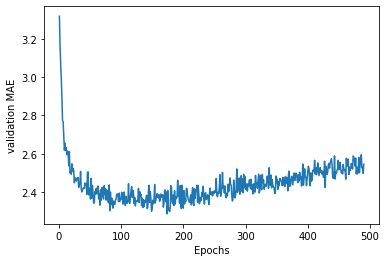

In [73]:
# vaildation 점수 그래프
# 처음 몇 번의 epochs동안 mae가 너무 높기때문에 가시성을 위해 제거
plt.plot(range(1, len(avg_mae_history[10:])+1), avg_mae_history[10:])
plt.xlabel('Epochs')
plt.ylabel('validation MAE')

책에서는 약 120 ~ 140번째 epochs 이후에 검증 MAE가 줄어들기를 멈추고, 과대적합이 시작되었다고 보고 있다. 따라서 epochs를 130으로 잡고 모델을 훈련시킨 뒤 test 해보자

In [74]:
model_2 = build_model()
model_2.fit(train_x, train_y, epochs=130, batch_size=16, verbose=0)
model_2.evaluate(test_x, test_y)

4/4 [==============================] - 0s 3ms/step - loss: 17.6082 - mae: 2.8086


[17.60822868347168, 2.808640480041504]

## 학습 조기 종료 시키기(EarlyStopping)
과적합을 방지하는 방법 중 하나로 사용하는 콜백 함수이다. 적절한 시점에 학습을 종료시킬 수 있도록 옵션을 주어 사용하는 콜백함수
```python
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
model.fit(X_train, Y_train, epoch = 1000, callbacks = [early_stopping])
```
위와 같이 설정하면 에폭을 1000으로 지정했더라도 콜백함수에서 설정한 조건을 만족하면 학습을 조기종료시킨다. 조건 설정을 위한 파라미터는 아래와 같다
```python
EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 0, mode = 'auto')
```
- `monitor` : 학습 조기종료를 위해 관찰하는 항목. val_loss나 val_accuracy가 주로 사용된다. (default = val_loss)
- `min_delta` : 개선되고 있다고 판단하기 위한 최소 변화량. 만약 변화량이 min_delta보다 적은 경우에는 개선이 없다고 판단 (default = 0)
- `patience` : 개선이 안된다고 바로 종료시키지 않고, 개선을 위해 몇 번의 에폭을 기다릴지 설정한다. (default = 0)
- `mode` : 관찰항목에 대해 개선이 없다고 판단하기 위한 기준을 설정. monitor에서 설정한 항목이 val_loss이면 값이 감소되지 않을 때 종료하여야 하므로 min을 설정하고, val_accuracy의 경우에는 max를 설정해야 한다. (default = auto)<br>
  - auto : monitor에 설정된 이름에 따라 자동으로 지덩
  - min : 관찰값이 감소하는 것을 멈출 때 학습을 종료하겠다.
  - max : 관찰값이 증가하는 것을 멈출 때, 학습을 종료

In [75]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 20, mode = 'auto')

k = 4
num_val_samples = len(train_x) // k
num_epochs = 500
all_mae_histories = []

for i in range(k) :
  print(f'{i}번째 폴드 처리중')
  # 분할 하나를 validation 용으로 빼놓기
  val_data = train_x[i*num_val_samples : (i+1)*num_val_samples]
  val_targets = train_y[i*num_val_samples : (i+1)*num_val_samples]

  # 다른 분할 전체를 train 용으로 데이터 준비
  par_train_data = np.concatenate([
      train_x[:i*num_val_samples],
      train_x[(i+1)*num_val_samples:]
  ], axis = 0)
  par_train_targets = np.concatenate([
      train_y[:i*num_val_samples],
      train_y[(i+1)*num_val_samples:]
  ], axis = 0)

  # 모델 구성
  model = build_model()

  # fit 해주기
  history = model.fit(
      par_train_data, par_train_targets,
      validation_data=(val_data, val_targets),
      epochs = num_epochs, batch_size=16, verbose=1,
      callbacks = [early_stopping])

  # 각 폴드의 validation 값 저장하기
  mae_history = history.history['val_mae']

  # 저장해주기
  all_mae_histories.append(mae_history)

0번째 폴드 처리중
Epoch 1/500
19/19 [==============================] - 1s 11ms/step - loss: 544.0913 - mae: 21.5044 - val_loss: 469.6920 - val_mae: 19.4342
Epoch 2/500
19/19 [==============================] - 0s 3ms/step - loss: 428.0374 - mae: 18.7335 - val_loss: 335.1812 - val_mae: 16.0393
Epoch 3/500
19/19 [==============================] - 0s 3ms/step - loss: 290.8565 - mae: 14.9892 - val_loss: 196.6243 - val_mae: 11.8786
Epoch 4/500
19/19 [==============================] - 0s 4ms/step - loss: 164.2943 - mae: 10.6648 - val_loss: 94.4267 - val_mae: 7.6779
Epoch 5/500
19/19 [==============================] - 0s 4ms/step - loss: 82.8760 - mae: 7.2402 - val_loss: 47.5909 - val_mae: 5.1174
Epoch 6/500
19/19 [==============================] - 0s 3ms/step - loss: 46.7261 - mae: 5.2827 - val_loss: 33.1936 - val_mae: 3.9953
Epoch 7/500
19/19 [==============================] - 0s 3ms/step - loss: 33.2748 - mae: 4.3421 - val_loss: 26.4162 - val_mae: 3.3796
Epoch 8/500
19/19 [========================

훈련들이 조기종료되는 것을 확인했다. 이 모델로 test data를 최종 훈련해보자

In [76]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 3ms/step - loss: 20.6473 - mae: 2.7961


[20.64731216430664, 2.796088695526123]

위에서 책대로 epochs=130을 주고 훈련시킨 모델로 실행한 evaluate에서는
```
[15.926226615905762, 2.63193678855896]
```
의 결과가 나왔었다. 조기 종료를 시킨 모델로 실행했을 때는
```
[15.046340942382812, 2.751631736755371]
```
의 값이 나왔으니 대략 비슷하게 뽑힌것을 알 수 있다. patience 값을 적절히 조절하는 것이 중요할 것 같아